In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import nengo

# Combining

Combine two scalars into a vector

In [40]:
model = nengo.Network(label="Combining")
with model:
    A = nengo.Ensemble(100, dimensions=1, label="A")
    B = nengo.Ensemble(100, dimensions=1, label="B")
    output = nengo.Ensemble(200, dimensions=2, label="2D Output")

    # stimulus
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

    # connect stim to inputs
    nengo.Connection(sin, A)
    nengo.Connection(cos, B)

    # connect inputs to output
    nengo.Connection(A, output[1])
    nengo.Connection(B, output[0])

    # probes
    sin_probe = nengo.Probe(sin)
    cos_probe = nengo.Probe(cos)
    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    output_probe = nengo.Probe(output, synapse=0.01)

In [41]:
with nengo.Simulator(model) as sim:
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

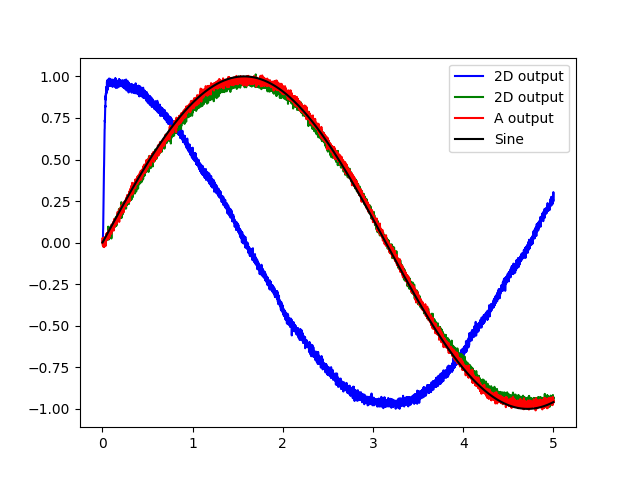

In [42]:
plt.figure()
plt.plot(sim.trange(), sim.data[output_probe][:, 0], "b", label="2D output")
plt.plot(sim.trange(), sim.data[output_probe][:, 1], "g", label="2D output")
plt.plot(sim.trange(), sim.data[A_probe], "r", label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "k", label="Sine")
plt.legend()

# Addition

Perform addition between two inputs

In [43]:
model = nengo.Network(label="Addition")
with model:
    A = nengo.Ensemble(100, dimensions=1, label="A")
    B = nengo.Ensemble(100, dimensions=1, label="B")
    C = nengo.Ensemble(100, dimensions=1, label="C")

    in_a = nengo.Node(output=0.5)
    in_b = nengo.Node(output=0.3)

    nengo.Connection(in_a, A)
    nengo.Connection(in_b, B)

    # simply connect both inputs to the output - they automatically sum
    nengo.Connection(A, C)
    nengo.Connection(B, C)

    in_a_probe = nengo.Probe(in_a)
    in_b_probe = nengo.Probe(in_b)

    A_probe = nengo.Probe(A, synapse=0.01)
    B_probe = nengo.Probe(B, synapse=0.01)
    C_probe = nengo.Probe(C, synapse=0.01)


In [44]:
with nengo.Simulator(model) as sim:
    sim.run(5)

/home/tariq/miniconda3/envs/nengo-tutorials/lib/python3.13/site-packages/nengo/builder/optimizer.py:654: UserWarning: Skipping some optimization steps because SciPy is not installed. Installing SciPy may result in faster simulations.
  warnings.warn(


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'time [s]')

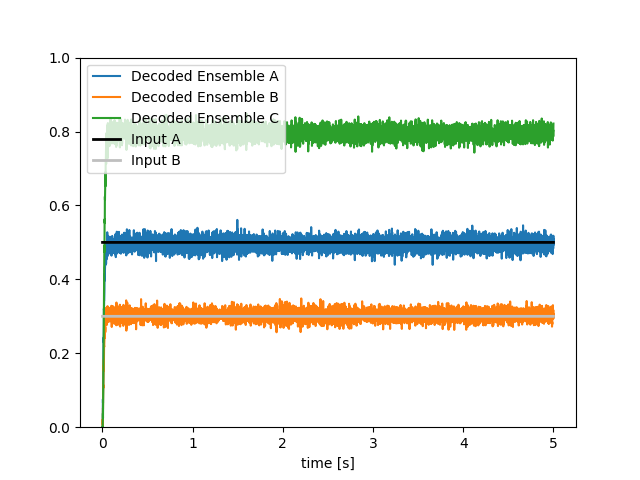

In [45]:
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded Ensemble A")
plt.plot(sim.trange(), sim.data[B_probe], label="Decoded Ensemble B")
plt.plot(sim.trange(), sim.data[C_probe], label="Decoded Ensemble C")
plt.plot(
    sim.trange(), sim.data[in_a_probe], label="Input A", color="k", linewidth=2.0
)
plt.plot(
    sim.trange(), sim.data[in_b_probe], label="Input B", color="0.75", linewidth=2.0
)
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")

# Linear Transform

An arbitrary linear transform

In [46]:
model = nengo.Network(label="Linear Transform")
with model:
    X = nengo.Ensemble(200, dimensions=2, label="A")
    Y = nengo.Ensemble(200, dimensions=3, label="B")

    in_x = nengo.Node(output=[0.5, -0.5])
    weights = np.array([[1, 0], [0, 1], [0.5, 0.5]])

    nengo.Connection(in_x, X)
    nengo.Connection(X, Y, transform=weights)

    in_x_probe = nengo.Probe(in_x)
    X_probe = nengo.Probe(X, synapse=0.01)
    Y_probe = nengo.Probe(Y, synapse=0.01)

In [47]:
with nengo.Simulator(model) as sim:
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

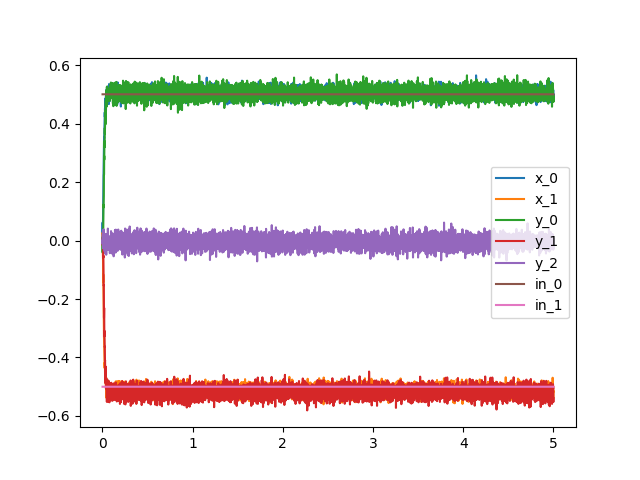

In [48]:
t = sim.trange()
plt.figure()
plt.plot(t, sim.data[X_probe], label=[f"x_{i}" for i in range(X.dimensions)])
plt.plot(t, sim.data[Y_probe], label=[f"y_{i}" for i in range(Y.dimensions)])
plt.plot(t, sim.data[in_x_probe], label=[f"in_{i}" for i in range(in_x.size_out)])
plt.legend()